# Plots 1

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn plotting style
sns.set_style(
    "darkgrid",
    {
        "axes.facecolor": ".95",
        "axes.edgecolor": "#000000",
        "grid.color": "#EBEBE7",
        "font.family": "serif",
        "axes.labelcolor": "#000000",
        "xtick.color": "#000000",
        "ytick.color": "#000000",
        "grid.alpha": 0.4,
    },
)

# Get the colorblind palette colors
colorblind_palette = sns.color_palette("colorblind")

blue = colorblind_palette[0]
orange = colorblind_palette[3]
green = colorblind_palette[2]

blue = "darkslateblue"  # Trying different colors for blue

COLORS = {"oracle": blue, "misspec": orange, "bayesian": green, "random": "gray"}

FILL_COLORS = {"oracle": blue, "misspec": orange, "bayesian": green, "random": "gray"}

In [51]:
all_dist_oracle = np.load('../results/bayesian_civ_distances.npy')
all_dist_misspec = np.load('../results/bayesian_civ_misspec_distances.npy')
all_dist_bayesian = np.load('../results/bayesian_civ_bayesian_distances.npy')
all_dist_random = np.load('../results/bayesian_civ_random_distances.npy')
all_shd_bayesian = np.load('../results/bayesian_civ_shd.npy')

In [59]:
# Compute mean and std
std_scaling = .5

mean_oracle = np.mean(all_dist_oracle, axis=0)
std_oracle = std_scaling * np.std(all_dist_oracle, axis=0)

mean_misspec = np.mean(all_dist_misspec, axis=0)
std_misspec = std_scaling * np.std(all_dist_misspec, axis=0)

mean_bayesian = np.mean(all_dist_bayesian, axis=0)
std_bayesian = std_scaling * np.std(all_dist_bayesian, axis=0)

mean_random = np.mean(all_dist_random, axis=0)
std_random = std_scaling * np.std(all_dist_random, axis=0)

mean_shd = np.mean(all_shd_bayesian, axis=0)
std_shd = std_scaling * np.std(all_shd_bayesian, axis=0)

In [60]:
def smoothing(y, window_size=5):
    for i in range(len(y)):
        y[i] = np.mean(y[max(0, i-window_size):min(len(y), i+window_size)])
    return y

mean_oracle = smoothing(mean_oracle)
std_oracle = smoothing(std_oracle)
mean_misspec = smoothing(mean_misspec)
std_misspec = smoothing(std_misspec)
mean_bayesian = smoothing(mean_bayesian)
std_bayesian = smoothing(std_bayesian)
mean_random = smoothing(mean_random)
std_random = smoothing(std_random)


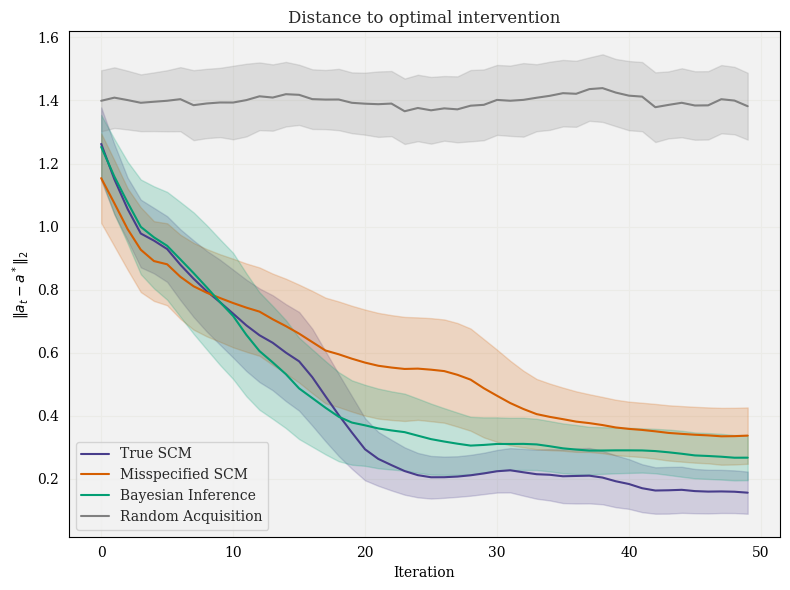

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))

steps = np.arange(mean_oracle.shape[0])

ax.plot(steps, mean_oracle, label='True SCM', color=COLORS["oracle"])
ax.fill_between(steps, mean_oracle - std_oracle, mean_oracle + std_oracle, alpha=0.2, color=FILL_COLORS["oracle"])

ax.plot(steps, mean_misspec, label='Misspecified SCM', color=COLORS["misspec"])
ax.fill_between(steps, mean_misspec - std_misspec, mean_misspec + std_misspec, alpha=0.2, color=FILL_COLORS["misspec"])

ax.plot(steps, mean_bayesian, label='Bayesian Inference', color=COLORS["bayesian"])
ax.fill_between(steps, mean_bayesian - std_bayesian, mean_bayesian + std_bayesian, alpha=0.2, color=FILL_COLORS["bayesian"])

ax.plot(steps, mean_random, label='Random Acquisition', color=COLORS["random"])
ax.fill_between(steps, mean_random - std_random, mean_random + std_random, alpha=0.2, color=FILL_COLORS["random"])

ax.set_xlabel('Iteration')
ax.set_ylabel(r'$\|a_t - a^*\|_2$')
ax.set_title('Distance to optimal intervention')
ax.legend()

plt.tight_layout()
plt.show()

# Plots 2

In [11]:
# Cell 1: Imports and Setup
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

# Set matplotlib style
plt.style.use('seaborn-v0_8-paper')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 10

results_dir = Path('../results')

In [12]:
# Cell 2: Load Experiment 1 Results
def load_exp1_results(p_values=[10, 20, 30], n_trials=15):
    """Load all Experiment 1 results for given p values"""
    
    results = {}
    methods = ['oracle', 'misspec', 'bayesian', 'random']
    
    for p in p_values:
        p_dir = results_dir / 'exp1' / f'p{p}'
        
        if not p_dir.exists():
            print(f"Warning: {p_dir} does not exist, skipping p={p}")
            continue
            
        results[p] = {method: [] for method in methods}
        results[p]['shd'] = []
        
        for trial in range(n_trials):
            # Load distances for each method
            for method in methods:
                file_path = p_dir / f'trial{trial}_{method}.npy'
                if file_path.exists():
                    results[p][method].append(np.load(file_path))
                else:
                    print(f"Missing: {file_path}")
            
            # Load SHD for bayesian method
            shd_path = p_dir / f'trial{trial}_shd.npy'
            if shd_path.exists():
                results[p]['shd'].append(np.load(shd_path))
        
        # Convert lists to arrays and compute statistics
        for key in results[p]:
            if len(results[p][key]) > 0:
                results[p][key] = np.array(results[p][key])  # shape: (n_trials, T)
                print(f"p={p}, {key}: {results[p][key].shape}")
    
    return results

exp1_results = load_exp1_results()

p=10, oracle: (15, 50)
p=10, misspec: (15, 50)
p=10, bayesian: (15, 50)
p=10, random: (15, 50)
p=10, shd: (15, 50)
p=20, oracle: (15, 50)
p=20, misspec: (15, 50)
p=20, bayesian: (15, 50)
p=20, random: (15, 50)
p=20, shd: (15, 50)


In [25]:
def smoothing(y, window_size=3):
    for i in range(len(y)):
        y[i] = np.mean(y[max(0, i-window_size):min(len(y), i+window_size)])
    return y

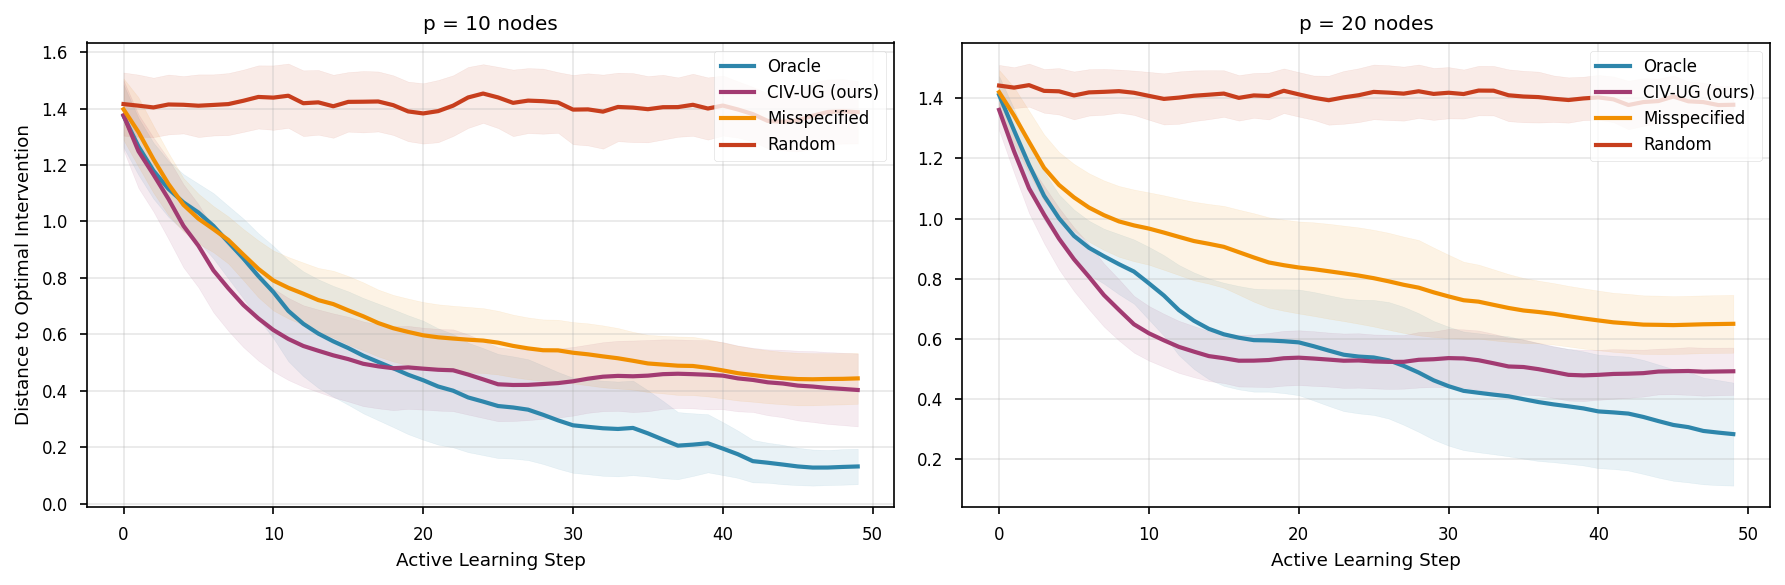

In [55]:
# Cell 3: Plot Experiment 1 - Convergence Curves
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

p_values = [10, 20, 30]
colors = {
    'oracle': '#2E86AB',      # blue
    'bayesian': '#A23B72',    # purple  
    'misspec': '#F18F01',     # orange
    'random': '#C73E1D'       # red
}
labels = {
    'oracle': 'Oracle',
    'bayesian': 'CIV-UG (ours)',
    'misspec': 'Misspecified',
    'random': 'Random'
}

for idx, p in enumerate(p_values[:2]):
    ax = axes[idx]
    
    if p not in exp1_results:
        ax.text(0.5, 0.5, f'No data for p={p}', 
                ha='center', va='center', transform=ax.transAxes)
        continue
    
    for method in ['oracle', 'bayesian', 'misspec', 'random']:
        if method not in exp1_results[p] or len(exp1_results[p][method]) == 0:
            continue
            
        data = exp1_results[p][method]  # shape: (n_trials, T)
        mean = smoothing(data.mean(axis=0))
        std = .5 * smoothing(data.std(axis=0))
        T = len(mean)
        
        ax.plot(range(T), mean, label=labels[method], 
                color=colors[method], linewidth=2)
        ax.fill_between(range(T), mean - std, mean + std, 
                        color=colors[method], alpha=0.1)
    
    ax.set_xlabel('Active Learning Step')
    ax.set_title(f'p = {p} nodes')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel('Distance to Optimal Intervention')

plt.tight_layout()
plt.savefig('exp1_convergence.pdf', bbox_inches='tight')
plt.savefig('exp1_convergence.png', bbox_inches='tight', dpi=300)
plt.show()

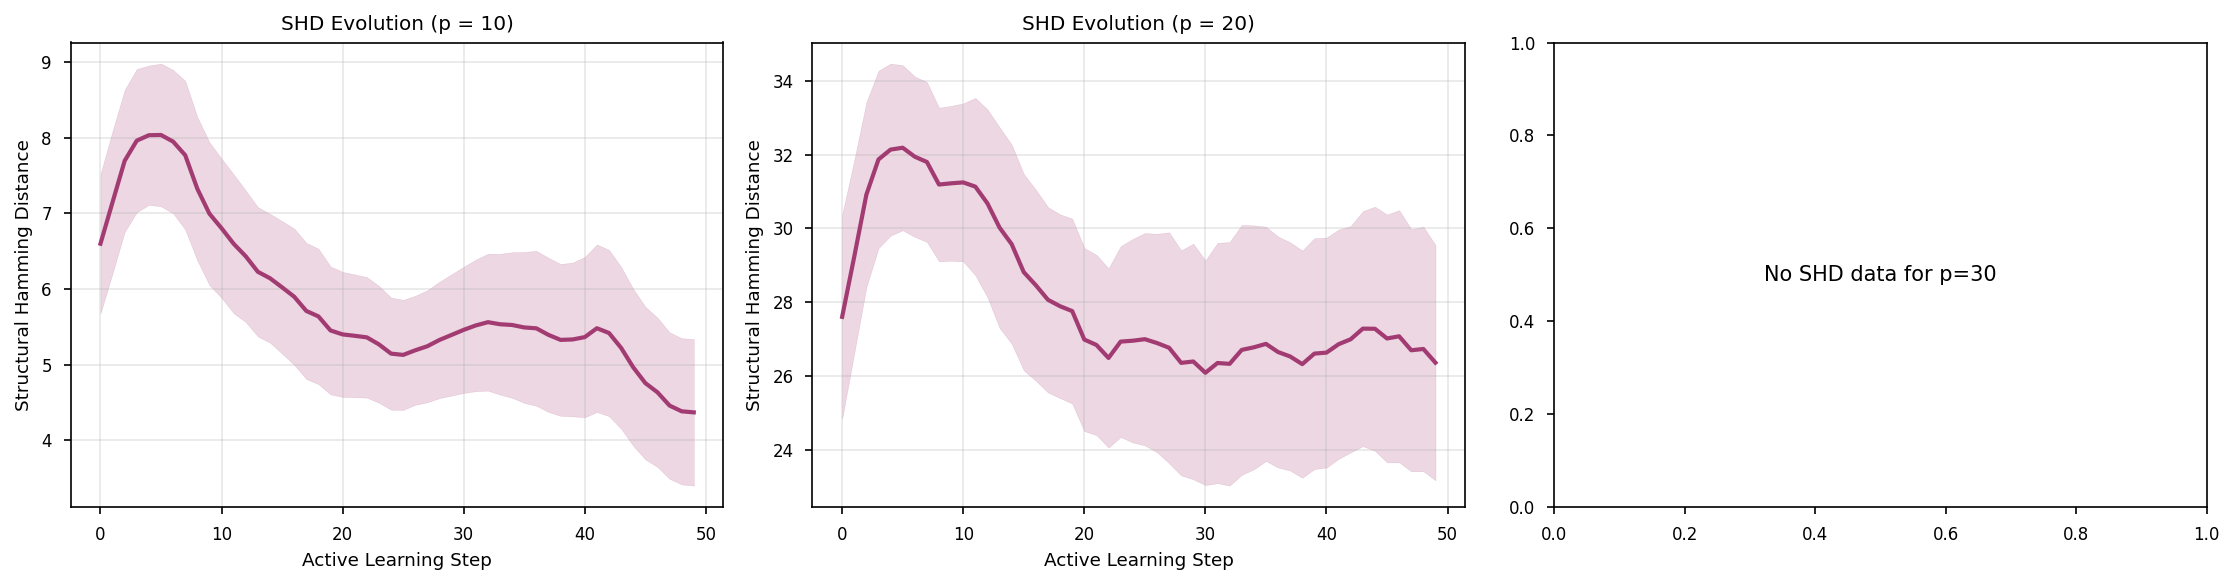

In [37]:
# Cell 4: Plot Experiment 1 - SHD Over Time
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, p in enumerate(p_values):
    ax = axes[idx]
    
    if p not in exp1_results or 'shd' not in exp1_results[p]:
        ax.text(0.5, 0.5, f'No SHD data for p={p}', 
                ha='center', va='center', transform=ax.transAxes)
        continue
    
    shd_data = exp1_results[p]['shd']  # shape: (n_trials, T)
    if len(shd_data) == 0:
        continue
        
    mean = smoothing(shd_data.mean(axis=0))
    std = .25 * smoothing(shd_data.std(axis=0))
    T = len(mean)
    
    ax.plot(range(T), mean, color='#A23B72', linewidth=2)
    ax.fill_between(range(T), mean - std, mean + std, 
                    color='#A23B72', alpha=0.2)
    
    ax.set_xlabel('Active Learning Step')
    ax.set_ylabel('Structural Hamming Distance')
    ax.set_title(f'SHD Evolution (p = {p})')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('exp1_shd.pdf', bbox_inches='tight')
plt.savefig('exp1_shd.png', bbox_inches='tight', dpi=300)
plt.show()

In [46]:
# Cell 5: Compute Final Performance Metrics for Experiment 1
def compute_final_metrics(results, last_n_steps=10):
    """Compute average performance over last N steps"""
    
    metrics = []
    
    for p in sorted(results.keys()):
        for method in ['oracle', 'bayesian', 'misspec', 'random']:
            if method not in results[p] or len(results[p][method]) == 0:
                continue
                
            data = results[p][method]  # shape: (n_trials, T)
            
            # Average over last N steps, then over trials
            final_dist = data[:, -last_n_steps:].mean(axis=1).mean()
            final_std = data[:, -last_n_steps:].mean(axis=1).std()
            
            metrics.append({
                'p': p,
                'method': method,
                'final_dist_mean': final_dist,
                'final_dist_std': final_std
            })
    
    return pd.DataFrame(metrics)

metrics_df = compute_final_metrics(exp1_results)
print("\nFinal Performance (averaged over last 10 steps):")
print(metrics_df.pivot(index='p', columns='method', values='final_dist_mean').round(4))


Final Performance (averaged over last 10 steps):
method  bayesian  misspec  oracle  random
p                                        
10        0.4183   0.4441  0.1381  1.3770
20        0.4876   0.6449  0.3094  1.3891


# Plots 3

In [47]:
# Cell 6: Load Experiment 2 Results
def load_exp2_results(p=10, K_values=[1, 5, 10, 20], n_trials=15):
    """Load all Experiment 2 results for varying K"""
    
    results = {}
    
    for K in K_values:
        k_dir = results_dir / 'exp2' / f'p{p}' / f'K{K}'
        
        if not k_dir.exists():
            print(f"Warning: {k_dir} does not exist, skipping K={K}")
            continue
        
        results[K] = {'dist': [], 'shd': [], 'runtime': []}
        
        for trial in range(n_trials):
            dist_path = k_dir / f'trial{trial}_dist.npy'
            shd_path = k_dir / f'trial{trial}_shd.npy'
            runtime_path = k_dir / f'trial{trial}_runtime.npy'
            
            if dist_path.exists():
                results[K]['dist'].append(np.load(dist_path))
            if shd_path.exists():
                results[K]['shd'].append(np.load(shd_path))
            if runtime_path.exists():
                results[K]['runtime'].append(np.load(runtime_path))
        
        # Convert to arrays
        for key in results[K]:
            if len(results[K][key]) > 0:
                results[K][key] = np.array(results[K][key])
                print(f"K={K}, {key}: {results[K][key].shape}")
    
    return results

# Try p=10 first, fall back to p=5 if needed
exp2_results = load_exp2_results(p=10)
if not exp2_results:
    print("No results for p=10, trying p=5...")
    exp2_results = load_exp2_results(p=5)

K=1, dist: (15, 50)
K=1, shd: (15, 50)
K=1, runtime: (15,)
K=5, dist: (15, 50)
K=5, shd: (15, 50)
K=5, runtime: (15,)
K=10, dist: (15, 50)
K=10, shd: (15, 50)
K=10, runtime: (15,)
K=20, dist: (15, 50)
K=20, shd: (15, 50)
K=20, runtime: (15,)


In [48]:
# Cell 7: Experiment 2 - Summary Table
def compute_exp2_table(results, last_n_steps=10):
    """Create summary table for Experiment 2"""
    
    rows = []
    
    for K in sorted(results.keys()):
        dist_data = results[K]['dist']  # shape: (n_trials, T)
        runtime_data = results[K]['runtime']  # shape: (n_trials,)
        
        # Final distance (averaged over last N steps)
        final_dist_mean = dist_data[:, -last_n_steps:].mean(axis=1).mean()
        final_dist_std = dist_data[:, -last_n_steps:].mean(axis=1).std()
        
        # Runtime
        runtime_mean = runtime_data.mean()
        runtime_std = runtime_data.std()
        
        rows.append({
            'K': K,
            'Final Distance': f'{final_dist_mean:.4f} ± {final_dist_std:.4f}',
            'Runtime (s)': f'{runtime_mean:.1f} ± {runtime_std:.1f}',
            'Relative Performance': final_dist_mean / rows[0]['_raw_dist'] if rows else 1.0
        })
        rows[-1]['_raw_dist'] = final_dist_mean  # Store for relative calc
    
    df = pd.DataFrame(rows)
    df['Relative Performance'] = df['_raw_dist'] / df.loc[df['K'] == 1, '_raw_dist'].values[0]
    df = df.drop(columns=['_raw_dist'])
    
    return df

if exp2_results:
    exp2_table = compute_exp2_table(exp2_results)
    print("\nExperiment 2: Performance vs. K")
    print(exp2_table.to_string(index=False))


Experiment 2: Performance vs. K
 K  Final Distance   Runtime (s)  Relative Performance
 1 0.3400 ± 0.2337   42.8 ± 13.0              1.000000
 5 0.3031 ± 0.1405  226.4 ± 58.5              0.891517
10 0.3206 ± 0.1205 453.3 ± 127.2              0.942723
20 0.3471 ± 0.1529 856.6 ± 208.5              1.020722


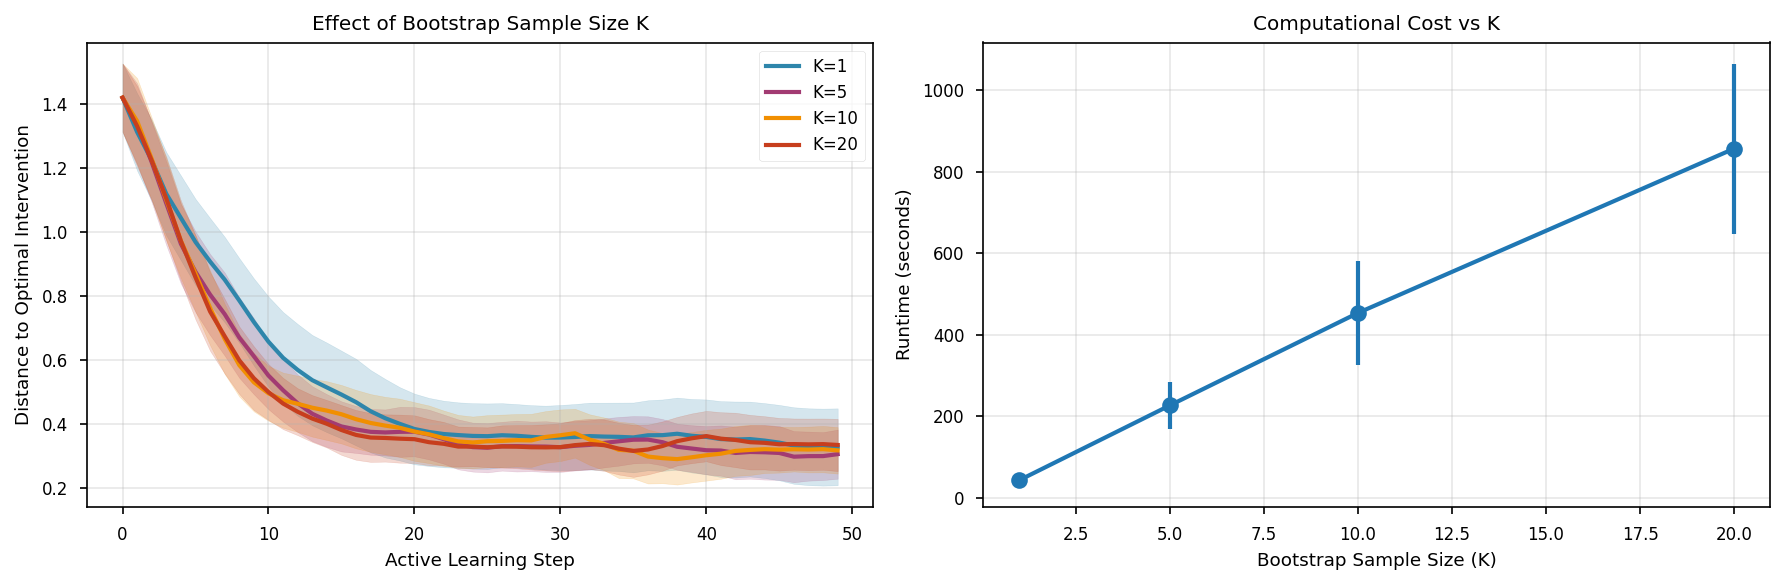

In [51]:
# Cell 8: Plot Experiment 2 - Convergence for Different K
if exp2_results:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    K_colors = {1: '#2E86AB', 5: '#A23B72', 10: '#F18F01', 20: '#C73E1D'}
    
    # Plot 1: Distance convergence
    for K in sorted(exp2_results.keys()):
        data = exp2_results[K]['dist']
        mean = smoothing(data.mean(axis=0))
        std = .5 * smoothing(data.std(axis=0))
        T = len(mean)
        
        color = K_colors.get(K, 'gray')
        ax1.plot(range(T), mean, label=f'K={K}', color=color, linewidth=2)
        ax1.fill_between(range(T), mean - std, mean + std, color=color, alpha=0.2)
    
    ax1.set_xlabel('Active Learning Step')
    ax1.set_ylabel('Distance to Optimal Intervention')
    ax1.set_title('Effect of Bootstrap Sample Size K')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Runtime vs K
    K_vals = sorted(exp2_results.keys())
    runtime_means = [exp2_results[K]['runtime'].mean() for K in K_vals]
    runtime_stds = [exp2_results[K]['runtime'].std() for K in K_vals]
    
    ax2.errorbar(K_vals, runtime_means, yerr=runtime_stds, 
                 marker='o', capsize=5, linewidth=2, markersize=8)
    ax2.set_xlabel('Bootstrap Sample Size (K)')
    ax2.set_ylabel('Runtime (seconds)')
    ax2.set_title('Computational Cost vs K')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('exp2_scaling.pdf', bbox_inches='tight')
    plt.savefig('exp2_scaling.png', bbox_inches='tight', dpi=300)
    plt.show()

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load results
shd_values = [5, 10, 15, 20]
n_trials = 5

final_dist_misspec = {shd: [] for shd in shd_values}
final_dist_civug = {shd: [] for shd in shd_values}

for shd in shd_values:
    results_dir = Path('../results') / 'exp3' / f'shd{shd}'
    for trial in range(n_trials):
        dist_misspec = np.load(results_dir / f'trial{trial}_misspec.npy')
        dist_civug = np.load(results_dir / f'trial{trial}_civug.npy')
        
        # Take final distance (step 50)
        final_dist_misspec[shd].append(dist_misspec[-1])
        final_dist_civug[shd].append(dist_civug[-1])

# Compute means and std
mean_misspec = [np.mean(final_dist_misspec[shd]) for shd in shd_values]
std_misspec = [np.std(final_dist_misspec[shd]) for shd in shd_values]
mean_civug = [np.mean(final_dist_civug[shd]) for shd in shd_values]
std_civug = [np.std(final_dist_civug[shd]) for shd in shd_values]

# Plot
plt.figure(figsize=(6, 4))
plt.errorbar(shd_values, mean_misspec, yerr=std_misspec, 
             marker='o', label='Misspecified', capsize=5)
plt.errorbar(shd_values, mean_civug, yerr=std_civug, 
             marker='s', label='CIV-UG (K=1)', capsize=5)
plt.xlabel('Structural Hamming Distance (SHD)')
plt.ylabel('Final Distance to Optimal Intervention')
plt.title('Sensitivity to Degree of Misspecification (p=10)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('exp3_results.pdf')
plt.show()

print("Mean final distances:")
print("Misspecified:", mean_misspec)
print("CIV-UG:", mean_civug)

FileNotFoundError: [Errno 2] No such file or directory: '../results/exp3/shd5/trial0_misspec.npy'